# In the mouth of Regression
> "As `Naive Bayes` was a good introduction to the Classification task, `Simple Linear Regression` is a good starting point of `Regression` tasks.

In [1]:
import sklearn.linear_model

#### These many regressions are available.

In [5]:
[reg for reg in dir(sklearn.linear_model) if '_' not in reg]

['ARDRegression',
 'BayesianRidge',
 'ElasticNet',
 'ElasticNetCV',
 'GammaRegressor',
 'Hinge',
 'Huber',
 'HuberRegressor',
 'Lars',
 'LarsCV',
 'Lasso',
 'LassoCV',
 'LassoLars',
 'LassoLarsCV',
 'LassoLarsIC',
 'LinearRegression',
 'Log',
 'LogisticRegression',
 'LogisticRegressionCV',
 'ModifiedHuber',
 'MultiTaskElasticNet',
 'MultiTaskElasticNetCV',
 'MultiTaskLasso',
 'MultiTaskLassoCV',
 'OrthogonalMatchingPursuit',
 'OrthogonalMatchingPursuitCV',
 'PassiveAggressiveClassifier',
 'PassiveAggressiveRegressor',
 'Perceptron',
 'PoissonRegressor',
 'RANSACRegressor',
 'Ridge',
 'RidgeCV',
 'RidgeClassifier',
 'RidgeClassifierCV',
 'SGDClassifier',
 'SGDRegressor',
 'SquaredLoss',
 'TheilSenRegressor',
 'TweedieRegressor']

**And intuative guide for regression**  
<img src="Types of Regression.png" >

### For now, we are going to start with the Simplest Regression model and the Explaination will be stated in the book itself.

#  

# Simple Regression - Linear Regression ( Just a line - not poly )

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [143]:
X = np.random.randn(100)
y = X + np.random.randn(100)# See here - And compare it with B

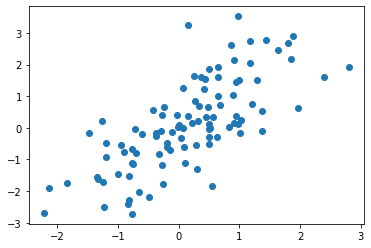

In [144]:
plt.plot(X, y, 'o')

### Note:
I have just added some noice to the data, and so it became a noisy and looking good kind.  
But the thing is that I have to added the `coef` and `intercept` to the data. I mean when we run the model and see that what is the intercept, it will be based on the noice and if we change the noice it will differ. 

But what if - I add the Intercept in the data and also add the coef to the data and let the model to figure out what are those?  
First check it without and with... 

*Simple noice*

In [145]:
model = LinearRegression()
model.fit(X[:, np.newaxis], y)

LinearRegression()

In [146]:
model.intercept_

-0.02809447653605543

In [147]:
model.coef_

array([1.06619559])

*Added Intercept and Coef - to LOOK HERE - B*

In [158]:
X = np.random.randn(100)
y = 2 * X + 5 + np.random.randn(100) # This is B - * 3 does not matter.

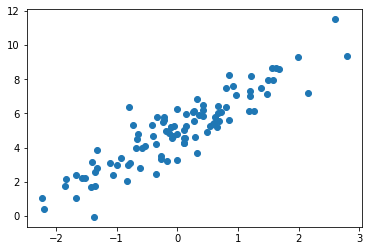

In [159]:
plt.plot(X, y, 'o')

In [160]:
model = LinearRegression()
model.fit(X[:, np.newaxis], y)

LinearRegression()

In [161]:
model.intercept_

4.982503451345876

In [162]:
model.coef_

array([1.84412358])

Now, look at the predicted values, they are accurately showing the Intercept and the Coef.  

**Let's draw the line!**

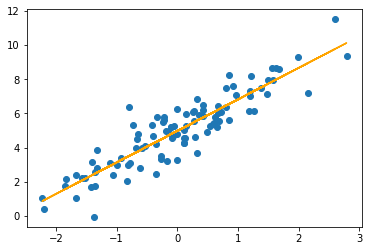

In [167]:
plt.scatter(X, y)
plt.plot(X, model.predict(X[:, np.newaxis]), color= 'orange')

## Wondering how this line is calculated?
Remember: **We are now in the world of Correlation**

The calculations are based on Standard Deviation.  
To get the line we need `Intercept` and `Coefficient`.  

So, the formula will become:
$$ y = \alpha + \beta x$$
* $ \alpha = \text {Intercept} $  
* $ \beta = \text {Coefficient} $

____

Now, how to get them?  
To get the `a` and `b` (for simple) we need to follow these.

#### 1. Find the Slope - Coef.
$$ \beta = r \frac{S_y} {S_x} $$

#### 2. Get the Intercept
$$ \alpha = \bar y + \beta \bar x$$

Simple as that! And WHoWhoo! We have finally discovered the Magic behind the line!<br>
But you will be suprised to know that we have learnt that in the 11th std!

<img src="Regression Walkthrough.jpg" width= 500 height= 1000>

Mark Checked if Calculated: <input type='checkbox'>

## 


**Now you know, there can be the data in which the relationship can not be found easily**  
As we already have discussed in the 'Feature Engineering' that, we can produce more features based on the single feature, so that we can plot it with the linear regression model.

We are going to do the same here, let's give it a try.

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [192]:
# Just to showcase what will happen with the Polynomial(7)...
temp = np.array([1, 2, 3, 4])
poly = PolynomialFeatures(7)

In [193]:
poly.fit_transform(temp[:, np.newaxis])

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01, 6.4000e+01, 1.2800e+02],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02, 7.2900e+02, 2.1870e+03],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03, 4.0960e+03, 1.6384e+04]])

The is just: $$ x^1, x^2, x^3, x^4, x^5, x^6, x^7 $$

### Continuing...

In [244]:
X = np.random.rand(50) * 10

In [245]:
X

array([6.53642659, 1.90690241, 5.83205643, 0.9783407 , 4.60817477,
       1.62166418, 8.13265551, 6.47093954, 9.30282394, 0.69852698,
       8.06338574, 8.17543506, 4.12835595, 7.09651607, 6.83641238,
       4.33232087, 8.73346703, 7.09201151, 6.22154999, 1.16583125,
       4.08794649, 4.69333806, 3.11753018, 0.46949945, 6.74159579,
       2.43051143, 4.76980472, 3.00829046, 6.82294102, 3.27291272,
       5.56127111, 6.60561984, 4.56258446, 0.79676844, 1.09715368,
       5.40823891, 6.8915241 , 8.40795468, 5.19053818, 4.20933285,
       9.09017222, 3.24467596, 0.71363109, 2.61893135, 6.77391845,
       8.98327229, 6.00702358, 5.12131457, 1.00669143, 0.77136713])

In [246]:
y = np.sin(X)

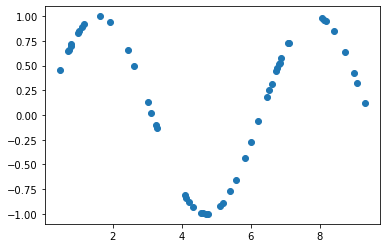

In [247]:
plt.scatter(X, y)

In [274]:
model = LinearRegression()
poly = PolynomialFeatures(7)

In [275]:
model.fit(poly.fit_transform(X[:, None]), y)

LinearRegression()

In [276]:
model.coef_

array([ 0.00000000e+00, -8.99265675e-02,  1.39117292e+00, -9.88860529e-01,
        2.45667306e-01, -2.66377393e-02,  1.21143275e-03, -1.53885097e-05])

In [277]:
model.intercept_

0.3027921222223092

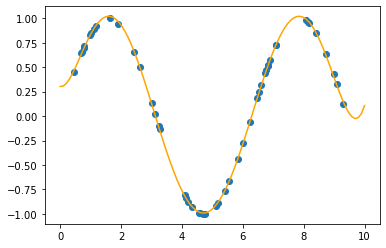

In [278]:
plt.scatter(X, y)

check_X = np.linspace(0, 10, 100)
plt.plot(check_X, model.predict(poly.fit_transform(check_X[:, None])), color= 'orange');

# 

**Fits well right?**
This is what `'Basis Function Regression'` is.

If my data were **noisy**... then...

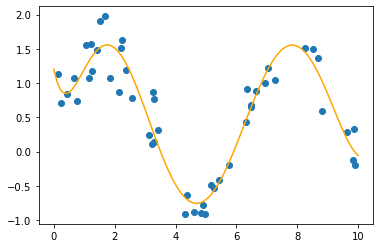

In [296]:
X = np.random.rand(50) * 10
y = np.sin(X) + np.random.rand(50)

model.fit(poly.fit_transform(X[:, None]), y)
plt.scatter(X, y)

check_X = np.linspace(0, 10, 100)
plt.plot(check_X, model.predict(poly.fit_transform(check_X[:, None])), color= 'orange');

#### Fits well right!